# Breast-Cancer Tumour Classification
## Task 1 – Data Exploration
## Task 2 – Data Preparation
## Task 3 – Model Training
## Task 4 – Evaluation & Visualisation
## Task 5 – Conclusion & Future Work


In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, RocCurveDisplay,
                             confusion_matrix, ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

plt.style.use("default")             # keep plots clean for the report
RANDOM_STATE = 42                    # reproducibility


In [4]:
df = pd.read_csv("breast_cancer_dataset.csv")  # place the CSV beside the notebook
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Task 01:**
- [ ] Class balance plot  
- [ ] df.describe() table  
- [ ] Histograms & box-plots  
- [ ] Pearson correlation heat-map


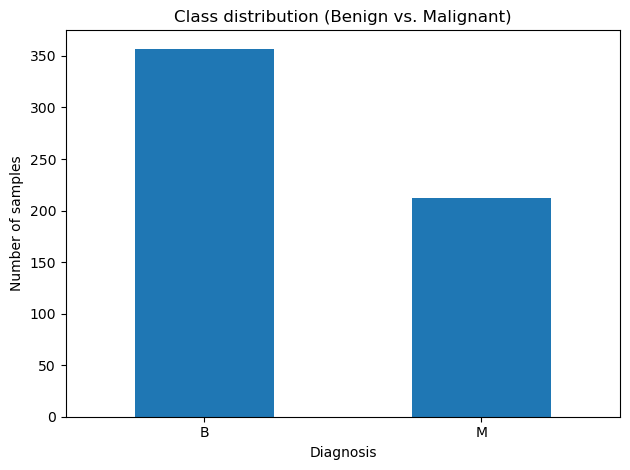

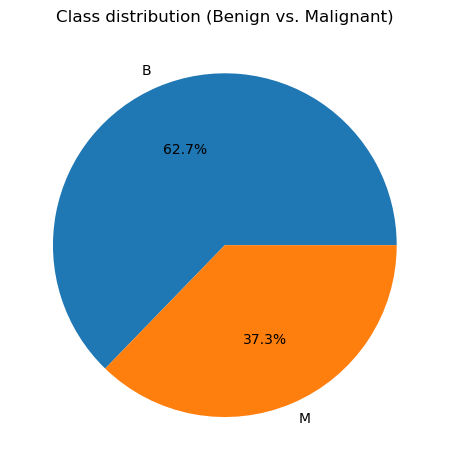

In [60]:
# Task: 1.1. Investigate the distribution of the target variable (Malignant vs. Benign). 

# Count benign (B) and malignant (M) samples
class_counts = df["diagnosis"].value_counts()   # returns a Series like: B 357, M 212

# ── BAR CHART (countplot equivalent) ──
plt.figure()
class_counts.plot(kind="bar")
plt.title("Class distribution (Benign vs. Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Number of samples")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ── PIE CHART ──
plt.figure()
class_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Class distribution (Benign vs. Malignant)")
plt.ylabel("")               # hide unnecessary y-label
plt.tight_layout()
plt.show()


c:\Users\hafiz\anaconda3\envs\llms\Lib\site-packages\matplotlib\axes\_axes.py:7124: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

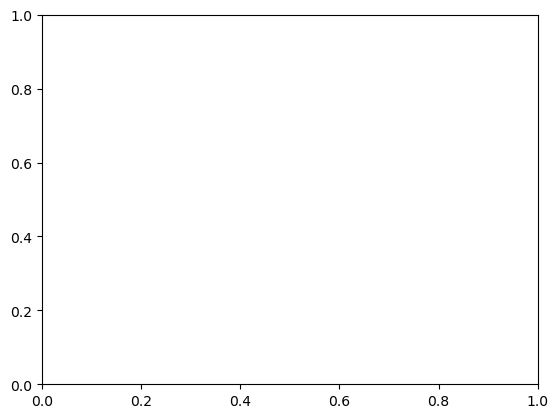

In [29]:
benign = df['diagnosis'] == 'B'
malignant = df['diagnosis'] == 'M'
plt.hist(benign, bins=30, alpha=0.5, label='Benign (357 samples)')
plt.hist(malignant, bins=30, alpha=0.5, label='Malignant (212 samples)')

plt.show()

``“The dataset contains 357 benign (63 %) and 212 malignant (37 %) cases.”``

**``Note``** that the class split is mildly imbalanced; you’ll keep this in mind when choosing metrics (focus on recall) or, if desired, apply re-sampling techniques such as SMOTE later in the workflow.

In [61]:
# # Task 1.2:  Generate basic statistics (mean, median, standard deviation) for numerical features. 

# # Examine the shape of the DataFrame
# print("Shape of the DataFrame:", df.shape)

# # Check data types
# print("\nData Types:")
# print(df.info())

# # Summarize descriptive statistics
# print("\nDescriptive Statistics:")
# print(df.describe().T)

# # Analyze the distribution of the target variable
# print("\nTarget Variable Distribution:")
# plt.figure(figsize=(6, 4))
# sns.countplot(x='diagnosis', data=df)
# plt.title('Distribution of Target Variable')
# plt.show()

# # Explore relationships between features and the target
# # keep only numeric predictors, drop the target column
# numerical_features = df.drop(columns=["diagnosis"]).select_dtypes(include="number").columns


# import math

# # Drop id and target so you really have the 30 predictors only
# num_features    = len(numerical_features)
# ncols           = 3                             # 3 plots per row
# nrows           = math.ceil(num_features / ncols)

# plt.figure(figsize=(5 * ncols, 4 * nrows))      # size scales with rows/cols

# for idx, feature in enumerate(numerical_features, start=1):
#     plt.subplot(nrows, ncols, idx)
#     sns.boxplot(x="diagnosis", y=feature, data=df)
#     plt.title(feature)
# # plt.figure(figsize=(15, 10))
# # for i, feature in enumerate(numerical_features):
# #     plt.subplot(2, 3, i + 1)
# #     sns.boxplot(x='diagnosis', y=feature, data=df)
# #     plt.title(f'{feature} vs. Target(diagnosis)')
# plt.tight_layout()
# plt.show()

# # Investigate correlations between features
# plt.figure(figsize=(12, 10))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix Heatmap')
# plt.show()

# print("\nObservations:")
# print("1. Initial observations on data types, distributions, and potential outliers.")
# print("2. Observations on the relationship between the target and features based on the visualizations.")
# print("3. Observations on highly correlated features based on the correlation matrix.")

Shape of the DataFrame: (569, 33) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    flo

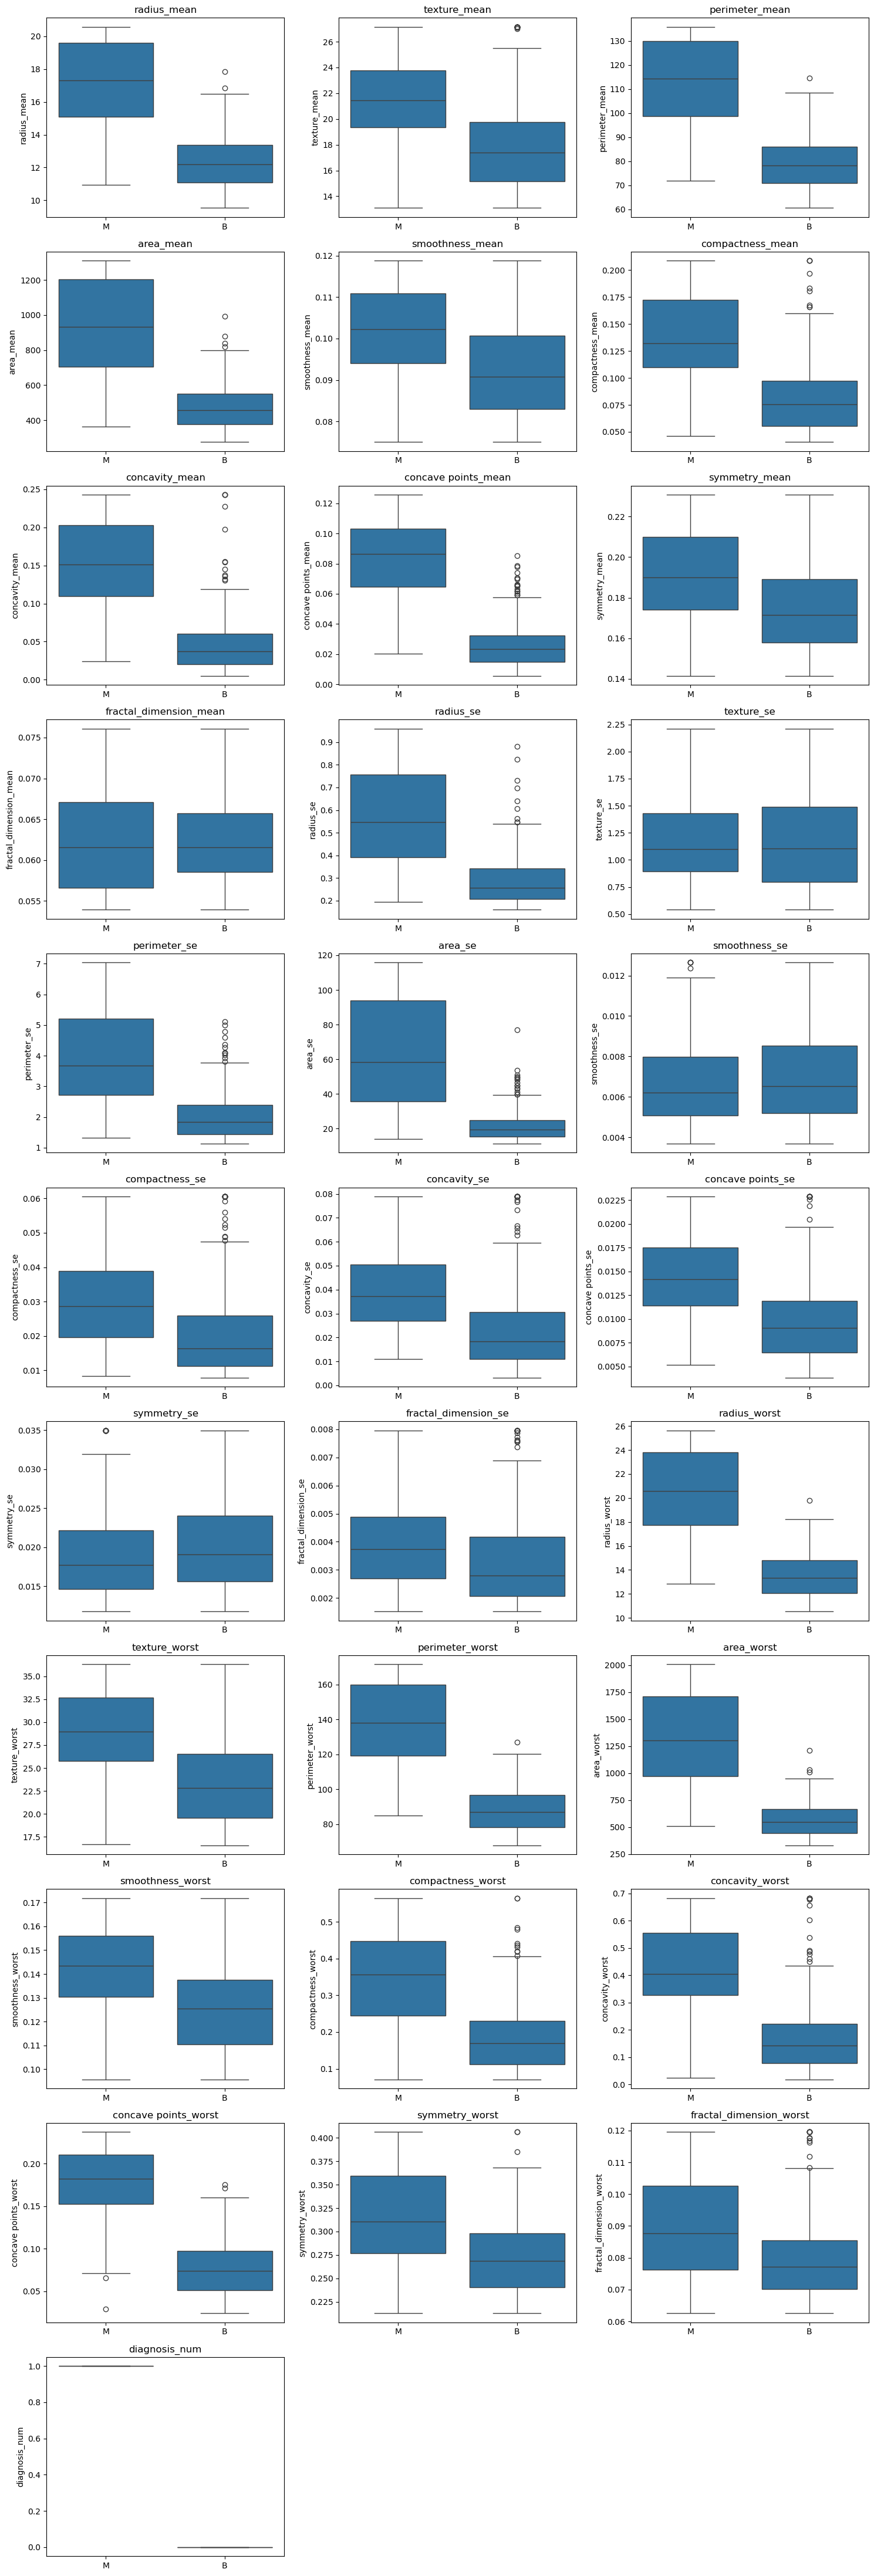

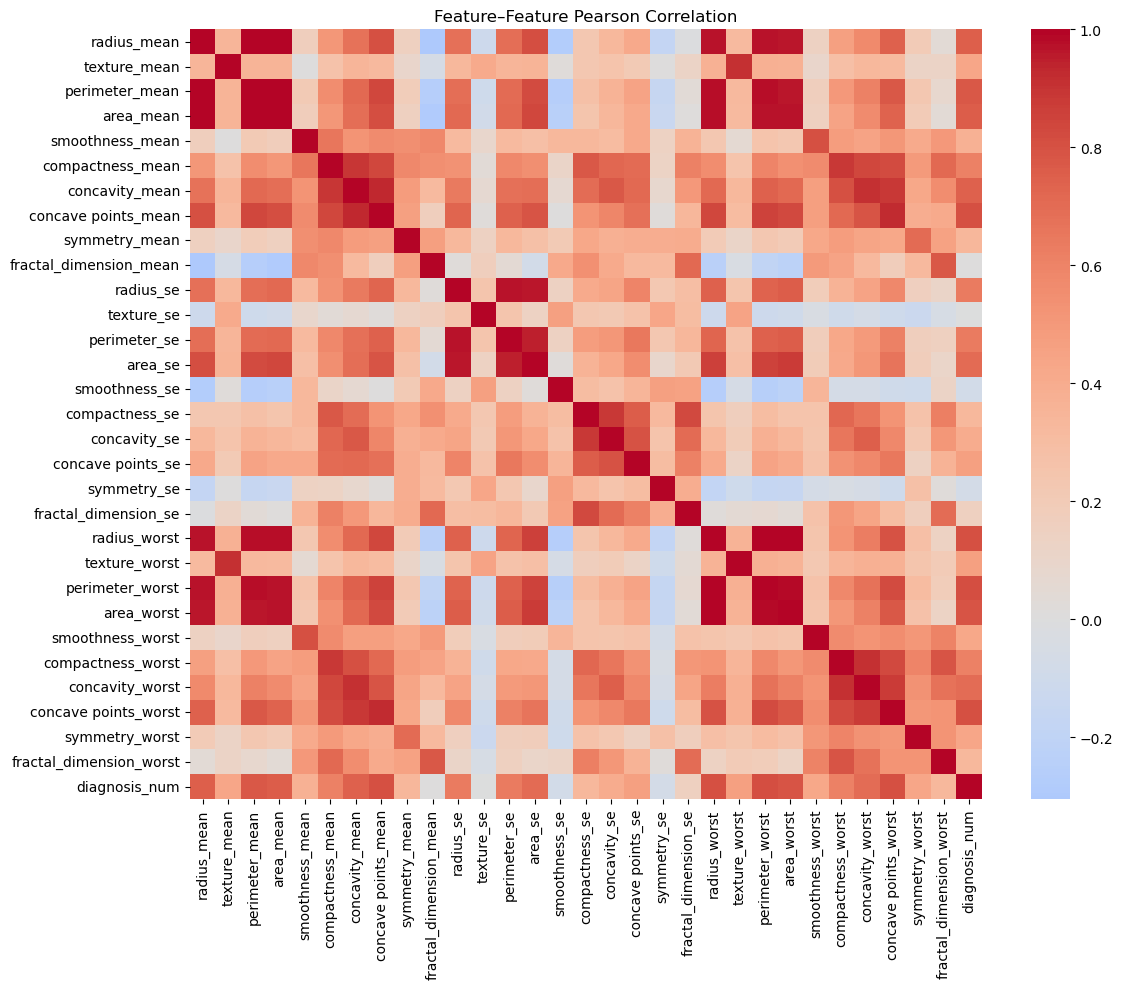


Highest std/mean ratios (possible skew/outliers):
diagnosis_num          1.30
concavity_mean         0.82
area_se                0.79
concave points_mean    0.73
concavity_worst        0.71
concavity_se           0.67
compactness_se         0.60
area_worst             0.56
Name: std/mean, dtype: float64


In [62]:
# ─────────────────────────────────────────
# Task 1.2 – Descriptive statistics & EDA
# ─────────────────────────────────────────

import math

# 2. BASIC INFO ───────────────────────────
print("Shape of the DataFrame:", df.shape, "\n")
print(df.info())

# 3. DESCRIPTIVE STATISTICS ───────────────
#    Build a table with mean, std, and the spread-to-centre ratio.
desc = (
    df.select_dtypes("number")
      .drop(columns="id")          # keep id out of the stats
      .describe()
      .T
)
desc["std/mean"] = desc["std"] / desc["mean"]
print("\nDescriptive statistics (excerpt):")
print(desc[["mean", "std", "std/mean"]].round(3).head())   # show first few rows

# 5. BOX-PLOTS FOR EVERY NUMERIC FEATURE ──
numeric_features = (
    df.drop(columns=["diagnosis", "id"])
      .select_dtypes("number")
      .columns
)
n_features = len(numeric_features)
ncols      = 3                           # three plots per row
nrows      = math.ceil(n_features / ncols)

plt.figure(figsize=(5 * ncols, 4 * nrows))
for idx, feature in enumerate(numeric_features, start=1):
    plt.subplot(nrows, ncols, idx)
    sns.boxplot(x="diagnosis", y=feature, data=df)
    plt.title(feature)
    plt.xlabel("")                       # save space
plt.tight_layout()
plt.show()

# 6. CORRELATION MATRIX ───────────────────
plt.figure(figsize=(12, 10))
corr = (
    df.drop(columns=["diagnosis", "id"])   # focus on predictors only
      .corr(method="pearson")
)
sns.heatmap(corr, cmap="coolwarm", center=0, fmt=".2f", annot=False)
plt.title("Feature–Feature Pearson Correlation")
plt.tight_layout()
plt.show()

# 7. OPTIONAL: LIST TOP std/mean RATIOS ───
print("\nHighest std/mean ratios (possible skew/outliers):")
print(desc["std/mean"].sort_values(ascending=False).head(8).round(2))


Observations:
1. Initial observations on data types, distributions, and potential outliers.
2. Observations on the relationship between the target and features based on the visualizations.
3. Observations on highly correlated features based on the correlation matrix.

In [66]:
# ---------------------------------------------------------
# Correlation heat-map  +  list of highly-correlated pairs
# ---------------------------------------------------------
import itertools, numpy as np, pandas as pd, matplotlib.pyplot as plt

# 1. Encode the target (needed only if you also want feature-to-target r)
df["diagnosis_num"] = df["diagnosis"].map({"B": 0, "M": 1})

# 2. Keep only numeric predictors (drop id & encoded target for heat-map)
features = df.drop(columns=["id", "diagnosis", "diagnosis_num"])


# 5. List pairs with |r| > 0.85
high_pairs = []
for i, j in itertools.combinations(range(len(corr)), 2):
    r = corr.iat[i, j]
    if abs(r) > 0.85:
        high_pairs.append((corr.index[i], corr.columns[j], r))

high_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print(f"\nFound {len(high_pairs)} feature pairs with |r| > 0.85:\n")
for f1, f2, r in high_pairs:
    print(f"{f1:<25s}  ~  {f2:<25s}  r = {r:+.3f}")



Found 32 feature pairs with |r| > 0.85:

radius_mean                ~  perimeter_mean             r = +0.998
radius_mean                ~  area_mean                  r = +0.994
radius_worst               ~  perimeter_worst            r = +0.994
radius_worst               ~  area_worst                 r = +0.993
perimeter_mean             ~  area_mean                  r = +0.992
perimeter_worst            ~  area_worst                 r = +0.986
perimeter_mean             ~  radius_worst               r = +0.976
perimeter_mean             ~  perimeter_worst            r = +0.975
area_mean                  ~  radius_worst               r = +0.975
radius_mean                ~  radius_worst               r = +0.974
area_mean                  ~  area_worst                 r = +0.972
radius_se                  ~  perimeter_se               r = +0.970
area_mean                  ~  perimeter_worst            r = +0.969
radius_mean                ~  perimeter_worst            r = +0.969
radius

In [64]:
# Correlation between the features and the target variables

df[features.columns.tolist() + ["diagnosis_num"]].corr()["diagnosis_num"].sort_values(ascending=False)

diagnosis_num              1.000000
perimeter_worst            0.815182
concave points_mean        0.807060
concave points_worst       0.806724
radius_worst               0.805303
area_worst                 0.790729
perimeter_mean             0.770807
area_mean                  0.755360
radius_mean                0.754943
concavity_mean             0.743752
area_se                    0.705687
concavity_worst            0.696359
radius_se                  0.633646
perimeter_se               0.633006
compactness_worst          0.616235
compactness_mean           0.614785
texture_worst              0.466979
concave points_se          0.461633
texture_mean               0.437008
symmetry_worst             0.429452
smoothness_worst           0.426968
concavity_se               0.403112
smoothness_mean            0.372662
symmetry_mean              0.339228
fractal_dimension_worst    0.333331
compactness_se             0.330716
fractal_dimension_se       0.152891
fractal_dimension_mean     0

# **Task 02:  Data Preparation**

1. Assign the diagnosis column as the target variable. 
2. Identify any missing values. 
3. Discuss and implement an appropriate imputation strategy (drop, mean, median, etc.) if 
needed. 
4. Use a scaling approach (StandardScaler, MinMaxScaler) to ensure numerical features share 
a similar range.


In [27]:
# 1️⃣  Drop columns that are *not* predictors
#     • 'diagnosis' is the label, not a feature
#     • 'id' is just an identifier
X = df.drop(columns=["diagnosis", "id"])

# 2️⃣  Encode the label column into numbers
#     Malignant → 1   •   Benign → 0
y = df["diagnosis"].map({"M": 1, "B": 0})


In [55]:
for col in X.columns:
    df[col] = df[col].clip(lower=df[col].quantile(0.05), upper=df[col].quantile(0.95))
    
df_cleaned = df.copy()


# **Task 03: Model Training**: 
1. Split data into training and testing sets and explain the rationale for the chosen split ratio. 
2. Choose multiple classification algorithms (e.g., Logistic Regression, Support Vector Machine, 
Decision Tree, Random Forest, K-Nearest Neighbors). 
3. Train each chosen model on the training set. 
4. Record the default hyperparameters used initially. 

In [ ]:
# -------------------------------------------------------------
# Task 3.1: Build & evaluate an SVM (RBF kernel) with internal scaling
# -------------------------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

df = df_cleaned

# # Encode the label: Malignant = 1, Benign = 0
# df["diagnosis_num"] = df["diagnosis"].map({"M": 1, "B": 0})

X = df.drop(columns=["diagnosis", "diagnosis_num", "id"])   # predictors only
y = df["diagnosis_num"]

# 2️⃣  Train–test split (80 / 20, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# 3️⃣  Build the pipeline: StandardScaler  ➜  SVC
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(kernel="rbf", probability=True, random_state=42))
])

# 4️⃣  Fit and evaluate
svm_pipe.fit(X_train, y_train)

y_pred = svm_pipe.predict(X_test)

print(f"Test accuracy: {accuracy_score(y_test, y_pred):.3f}\n")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))


Test accuracy: 0.974

              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Evaluation metrics:
 Accuracy     0.974
Precision    0.976
Recall       0.952
F1-score     0.964
ROC-AUC      0.995


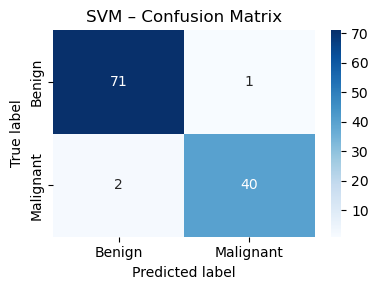

<Figure size 400x400 with 0 Axes>

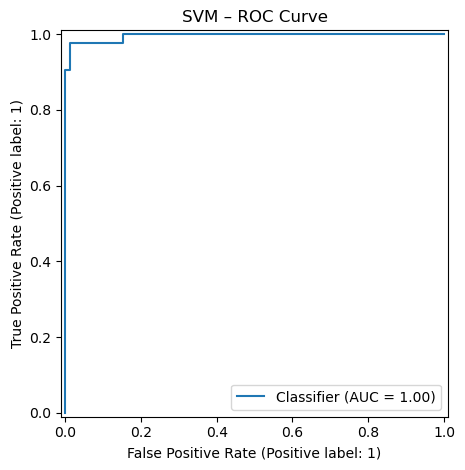


Classification report (Benign = 0, Malignant = 1):

              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [57]:
# ─────────────────────────────────────────────
# Evaluate the SVM pipeline on the held-out set
# ─────────────────────────────────────────────
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report, RocCurveDisplay)

# 1️⃣  Get predictions and class-1 probabilities
y_pred  = svm_pipe.predict(X_test)              # pipeline already scales
y_proba = svm_pipe.predict_proba(X_test)[:, 1]  # needed for ROC-AUC

# 2️⃣  Collect core metrics in a tidy Series
metrics = pd.Series({
    "Accuracy" : accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall"   : recall_score(y_test, y_pred),
    "F1-score" : f1_score(y_test, y_pred),
    "ROC-AUC"  : roc_auc_score(y_test, y_proba)
}).round(3)

print("Evaluation metrics:\n", metrics.to_string())

# 3️⃣  Confusion-matrix heat-map (labelled)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm,
            annot=True, fmt="d", cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("SVM – Confusion Matrix")
plt.tight_layout()
plt.show()

# 4️⃣  ROC curve
plt.figure(figsize=(4, 4))
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("SVM – ROC Curve")
plt.tight_layout()
plt.show()

# 5️⃣  Full per-class report
print("\nClassification report (Benign = 0, Malignant = 1):\n")
print(classification_report(y_test, y_pred,
                            target_names=["Benign", "Malignant"]))


In [58]:
# Task 3.2: Choose multiple classification algorithms (e.g., Logistic Regression, Support Vector Machine, 
#                                                                Decision Tree, Random Forest, K-Nearest Neighbors). 
# ──────────────────────────────────────────────
# Train & compare five classification algorithms
# ──────────────────────────────────────────────
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score)
import pandas as pd

# 1️⃣  Define a helper to build scaled / unscaled pipelines
def make_pipeline(model, scale=True):
    steps = []
    if scale:
        steps.append(("scaler", StandardScaler()))
    steps.append(("model", model))
    return Pipeline(steps)

# 2️⃣  Instantiate each classifier with sensible defaults
models = {
    "LogReg":    make_pipeline(LogisticRegression(max_iter=1000, random_state=42)),
    "SVM":       make_pipeline(SVC(kernel="rbf", probability=True, random_state=42)),
    "KNN":       make_pipeline(KNeighborsClassifier(n_neighbors=5)),
    "DecTree":   make_pipeline(DecisionTreeClassifier(random_state=42), scale=False),
    "RandForest":make_pipeline(RandomForestClassifier(
                    n_estimators=200, max_depth=None, random_state=42), scale=False)
}

# 3️⃣  Train, predict, collect metrics
rows = []
for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_pred  = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe[-1], "predict_proba") else None

    rows.append({
        "Model":      name,
        "Accuracy":   accuracy_score(y_test, y_pred),
        "Precision":  precision_score(y_test, y_pred),
        "Recall":     recall_score(y_test, y_pred),
        "F1":         f1_score(y_test, y_pred),
        "ROC-AUC":    roc_auc_score(y_test, y_proba) if y_proba is not None else float("nan")
    })

results = (pd.DataFrame(rows)
           .set_index("Model")
           .round(3)
           .sort_values("ROC-AUC", ascending=False))

print("Comparison of baseline models:\n")
display(results)        # Jupyter will show a neat table



Comparison of baseline models:



,Accuracy,Precision,Recall,F1,ROC-AUC
Model,,,,,
LogReg,0.982,1.000,0.952,0.976,0.997
SVM,0.974,0.976,0.952,0.964,0.995
RandForest,0.965,1.000,0.905,0.950,0.995
KNN,0.939,0.973,0.857,0.911,0.981
DecTree,0.939,0.973,0.857,0.911,0.922


In [59]:
# ──────────────────────────────────────────────────────
# Task 4 – Hyper-parameter tuning of top models
# ──────────────────────────────────────────────────────
from sklearn.model_selection import GridSearchCV
import numpy as np

# 0️⃣  Re-use the train/test split and helper functions from earlier
def collect_metrics(model, X_test, y_test, label):
    """Return a dict of evaluation metrics for the given model."""
    y_pred  = model.predict(X_test)
    y_proba = (model.predict_proba(X_test)[:, 1]
               if hasattr(model, "predict_proba") else None)
    return {
        "Model":      label,
        "Accuracy":   accuracy_score(y_test, y_pred),
        "Precision":  precision_score(y_test, y_pred),
        "Recall":     recall_score(y_test, y_pred),
        "F1":         f1_score(y_test, y_pred),
        "ROC-AUC":    roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
    }

# 1️⃣  Hyper-parameter grids  (tweak ranges if you like)
param_grid_rf = {
    "model__n_estimators":  [100, 200, 300],
    "model__max_depth":     [None, 8, 12, 16],
    "model__min_samples_leaf": [1, 2, 4]
}

param_grid_svm = {
    "model__C":     [0.1, 1, 10, 100],
    "model__gamma": ["scale", 0.01, 0.005, 0.001]
}

# 2️⃣  Wrap each original pipeline in GridSearchCV
gs_rf  = GridSearchCV(models["RandForest"], param_grid_rf,
                      cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)
gs_svm = GridSearchCV(models["SVM"],        param_grid_svm,
                      cv=5, scoring="roc_auc", n_jobs=-1, verbose=1)

# 3️⃣  Fit the grid searches
print("⏳ Tuning Random Forest …")
gs_rf.fit(X_train, y_train)

print("\n⏳ Tuning SVM …")
gs_svm.fit(X_train, y_train)

# 4️⃣  Compare before vs. after on the held-out test set
results_tuning = pd.DataFrame([
    collect_metrics(models["RandForest"], X_test, y_test, "RF baseline"),
    collect_metrics(gs_rf.best_estimator_, X_test, y_test, "RF tuned"),
    collect_metrics(models["SVM"], X_test, y_test, "SVM baseline"),
    collect_metrics(gs_svm.best_estimator_, X_test, y_test, "SVM tuned")
]).set_index("Model").round(3)

print("\n── Performance before vs. after tuning ──")
display(results_tuning)

# 5️⃣  Show the best hyper-parameters
print("\nBest Random Forest params →", gs_rf.best_params_)
print("Best SVM params          →", gs_svm.best_params_)


⏳ Tuning Random Forest …
Fitting 5 folds for each of 36 candidates, totalling 180 fits

⏳ Tuning SVM …
Fitting 5 folds for each of 16 candidates, totalling 80 fits

── Performance before vs. after tuning ──


,Accuracy,Precision,Recall,F1,ROC-AUC
Model,,,,,
RF baseline,0.965,1.000,0.905,0.950,0.995
RF tuned,0.974,1.000,0.929,0.963,0.995
SVM baseline,0.974,0.976,0.952,0.964,0.995
SVM tuned,0.974,1.000,0.929,0.963,0.995



Best Random Forest params → {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 100}
Best SVM params          → {'model__C': 10, 'model__gamma': 0.01}


# **Task 04:**


# **Task 05:**


In [15]:
df['perimeter_worst'].nunique()

514